In [89]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

**【課題1】練習のために特徴量とカテゴリを選択**

選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica


sepal_lengthとpetal_length

In [90]:
# irisデータセットの読み込み
iris = load_iris()

iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])

df = pd.concat([X, y], axis=1)

# virgicolorとvirginicaの列を抽出
df = df.loc[:,["sepal_length","petal_length","Species"]]

# virgicolorとvirginicaの行を抽出
df = df[df["Species"].isin(['1','2'])]

In [91]:
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


**【問題2】データの分析**

まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


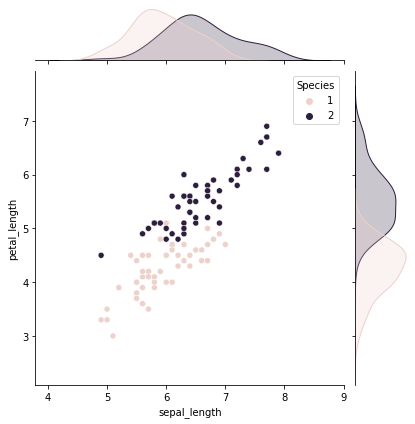

In [92]:
# 散布図
sns.jointplot('sepal_length', 'petal_length', data=df, hue="Species")

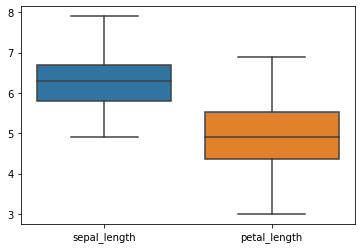

In [93]:
# 箱ひげ図
sns.boxplot(data=df.loc[:,["sepal_length","petal_length"]])

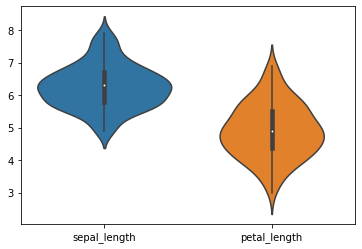

In [94]:
# バイオリン図
sns.violinplot(data=df.loc[:,["sepal_length","petal_length"]])

**【問題3】前処理・訓練データと検証データの分割**

前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [95]:
# 訓練データと検証データの分割
df_train, df_test = train_test_split(df)

# numpy.ndarrayに変換
arr_train_x = df_train.loc[:,["sepal_length","petal_length"]].values
arr_train_y = df_train.loc[:,["Species"]].values

arr_test_x = df_test.loc[:,["sepal_length","petal_length"]].values
arr_test_y = df_test.loc[:,["Species"]].values

# 訓練データ
print(arr_train_x)

# 検証データ
print(arr_train_y)

[[6.1 4.6]
 [7.2 6.1]
 [6.  5.1]
 [6.5 4.6]
 [6.7 5.2]
 [6.3 5. ]
 [5.8 5.1]
 [6.2 4.3]
 [5.6 4.1]
 [6.7 5.6]
 [5.9 4.8]
 [7.6 6.6]
 [6.3 5.1]
 [6.4 4.5]
 [5.9 5.1]
 [6.  4.8]
 [5.5 3.8]
 [6.  5. ]
 [7.7 6.7]
 [6.5 5.8]
 [6.8 4.8]
 [5.6 4.9]
 [6.7 5. ]
 [5.7 5. ]
 [5.8 4.1]
 [6.3 4.9]
 [6.5 5.2]
 [7.2 5.8]
 [7.4 6.1]
 [6.4 5.3]
 [6.4 5.5]
 [6.3 5.6]
 [5.8 5.1]
 [5.7 4.5]
 [6.1 4.9]
 [6.3 4.9]
 [5.2 3.9]
 [5.8 3.9]
 [6.7 5.7]
 [6.4 5.3]
 [7.9 6.4]
 [5.7 4.1]
 [5.4 4.5]
 [7.7 6.1]
 [5.7 3.5]
 [5.7 4.2]
 [4.9 3.3]
 [6.4 5.6]
 [5.  3.3]
 [6.8 5.9]
 [6.9 5.1]
 [5.5 3.7]
 [6.3 5.6]
 [6.4 5.6]
 [6.3 4.4]
 [6.  4. ]
 [6.6 4.4]
 [7.7 6.9]
 [4.9 4.5]
 [5.5 4. ]
 [5.7 4.2]
 [6.7 4.4]
 [7.2 6. ]
 [5.6 3.6]
 [5.9 4.2]
 [6.3 6. ]
 [6.1 4. ]
 [6.1 4.7]
 [6.  4.5]
 [6.5 5.5]
 [6.4 4.3]
 [6.1 5.6]
 [6.2 4.5]
 [5.8 5.1]
 [6.3 4.7]]
[[1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]

**【問題4】前処理・標準化**

分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。

In [96]:
# 標準化
sc = StandardScaler()

# 訓練用データ
sc = sc.fit(arr_train_x)
arr_train_x = sc.transform(arr_train_x)

# 検証用データ
arr_test_x = sc.transform(arr_test_x)

print(arr_train_x)

[[-0.22160952 -0.3917457 ]
 [ 1.48706204  1.46780669]
 [-0.3769433   0.22810509]
 [ 0.39972559 -0.3917457 ]
 [ 0.71039315  0.35207525]
 [ 0.08905803  0.10413493]
 [-0.68761086  0.22810509]
 [-0.06627575 -0.76365618]
 [-0.99827842 -1.0115965 ]
 [ 0.71039315  0.84795589]
 [-0.53227708 -0.14380539]
 [ 2.10839716  2.08765749]
 [ 0.08905803  0.22810509]
 [ 0.24439181 -0.51571586]
 [-0.53227708  0.22810509]
 [-0.3769433  -0.14380539]
 [-1.1536122  -1.38350698]
 [-0.3769433   0.10413493]
 [ 2.26373094  2.21162765]
 [ 0.39972559  1.09589621]
 [ 0.86572693 -0.14380539]
 [-0.99827842 -0.01983523]
 [ 0.71039315  0.10413493]
 [-0.84294464  0.10413493]
 [-0.68761086 -1.0115965 ]
 [ 0.08905803 -0.01983523]
 [ 0.39972559  0.35207525]
 [ 1.48706204  1.09589621]
 [ 1.7977296   1.46780669]
 [ 0.24439181  0.47604541]
 [ 0.24439181  0.72398573]
 [ 0.08905803  0.84795589]
 [-0.68761086  0.22810509]
 [-0.84294464 -0.51571586]
 [-0.22160952 -0.01983523]
 [ 0.08905803 -0.01983523]
 [-1.61961353 -1.25953682]
 

**【問題5】学習と推定**

最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [97]:
# 学習
neigh_1 = KNeighborsClassifier(n_neighbors=1).fit(arr_train_x, arr_train_y)
neigh_3 = KNeighborsClassifier(n_neighbors=3).fit(arr_train_x, arr_train_y)
neigh_5 = KNeighborsClassifier(n_neighbors=5).fit(arr_train_x, arr_train_y)

# 評価
pred_1 = neigh_1.predict(arr_test_x)
pred_3 = neigh_3.predict(arr_test_x)
pred_5 = neigh_5.predict(arr_test_x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


**【問題6】評価**

検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

*scikit-learnを使い4種類の指標を計算する*

・Accuracy（正解率）

正解率（accuracy）は、すべてのサンプルのうち正解したサンプルの割合。


In [98]:
# Accuracy（正解率）
print("n_neighbors = 1 : 正解率 {}".format(accuracy_score(arr_test_y, pred_1)))
print("n_neighbors = 3 : 正解率 {}".format(accuracy_score(arr_test_y, pred_3)))
print("n_neighbors = 5 : 正解率 {}".format(accuracy_score(arr_test_y, pred_5)))

n_neighbors = 1 : 正解率 0.96
n_neighbors = 3 : 正解率 0.96
n_neighbors = 5 : 正解率 0.96


・Precision（適合率）

適合率（precision）は、陽性と予測されたサンプルのうち正解したサンプルの割合。

PPV（positive predictive value）とも呼ばれる。

In [99]:
# Precision（適合率）
print("n_neighbors = 1 : 適合率 {}".format(precision_score(arr_test_y, pred_1)))
print("n_neighbors = 3 : 適合率 {}".format(precision_score(arr_test_y, pred_3)))
print("n_neighbors = 5 : 適合率 {}".format(precision_score(arr_test_y, pred_5)))

n_neighbors = 1 : 適合率 0.9333333333333333
n_neighbors = 3 : 適合率 0.9333333333333333
n_neighbors = 5 : 適合率 0.9333333333333333


・Recall（再現率）

再現率（recall）は実際に陽性のサンプルのうち正解したサンプルの割合。

sensitivityやhit rate, TPR（true positive rate, 真陽性率）などとも呼ばれる。

In [100]:
# Recall（再現率）
print("n_neighbors = 1 : 再現率 {}".format(recall_score(arr_test_y, pred_1)))
print("n_neighbors = 3 : 再現率 {}".format(recall_score(arr_test_y, pred_3)))
print("n_neighbors = 5 : 再現率 {}".format(recall_score(arr_test_y, pred_5)))

n_neighbors = 1 : 再現率 1.0
n_neighbors = 3 : 再現率 1.0
n_neighbors = 5 : 再現率 1.0


・F値

F1値（F1-measure）は適合率と再現率の調和平均。

 単純にF値（F-measure, F-score）と呼ばれることもある。

In [101]:
# F値
print("n_neighbors = 1 : F値 {}".format(f1_score(arr_test_y, pred_1)))
print("n_neighbors = 3 : F値 {}".format(f1_score(arr_test_y, pred_3)))
print("n_neighbors = 5 : F値 {}".format(f1_score(arr_test_y, pred_5)))

n_neighbors = 1 : F値 0.9655172413793104
n_neighbors = 3 : F値 0.9655172413793104
n_neighbors = 5 : F値 0.9655172413793104


*混同行列をscikit-learnを使い表示する*

In [102]:
cm_1 = confusion_matrix(arr_test_y, pred_1)
cm_3 = confusion_matrix(arr_test_y, pred_3)
cm_5 = confusion_matrix(arr_test_y, pred_5)

print("n_neighbors = 1 : 混合行列" )
print(cm_1)

print("n_neighbors = 3 : 混合行列" )
print(cm_3)

print("n_neighbors = 5 : 混合行列" )
print(cm_5)

n_neighbors = 1 : 混合行列
[[14  0]
 [ 1 10]]
n_neighbors = 3 : 混合行列
[[14  0]
 [ 1 10]]
n_neighbors = 5 : 混合行列
[[14  0]
 [ 1 10]]


**【問題7】可視化**


評価の一貫として可視化を行います。

今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。

以下にどう分割するかという 決定領域 を描く関数を用意しました。

これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [103]:
# 各指標値と結果の可視化を行う
def showResult(y, pred):

  print("正解率 {}".format(accuracy_score(y, pred)))
  print("適合率 {}".format(precision_score(y, pred)))
  print("再現率 {}".format(recall_score(y, pred)))
  print("F値 {}".format(f1_score(y, pred)))
  print("混合行列 {}".format(confusion_matrix(y, pred)))
  print("")

In [104]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

訓練用データ


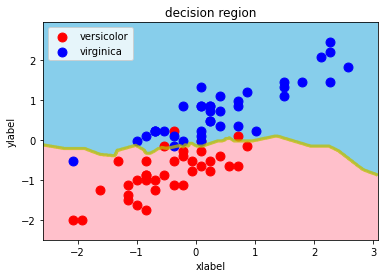

In [105]:
print("訓練用データ")
decision_region(arr_train_x, np.reshape(arr_train_y,[len(arr_train_y),]), neigh_5)

検証用データ


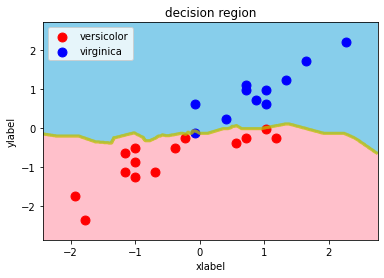

In [106]:
print("検証用データ")
decision_region(arr_test_x, np.reshape(arr_test_y,[len(arr_test_y),]), neigh_5)

**【問題8】他の手法の学習**

以下の全ての手法について学習・推定・評価・可視化を行ってください。

そして、指標値を１つの表にまとめてください。

その表と決定領域を利用して結果を簡単に考察してください。

どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

*最近傍法*

最近傍法


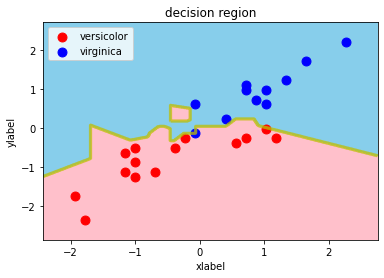

正解率 0.96
適合率 0.9333333333333333
再現率 1.0
F値 0.9655172413793104
混合行列 [[14  0]
 [ 1 10]]

<class 'numpy.ndarray'>


In [107]:
print("最近傍法")
decision_region(arr_test_x, np.reshape(arr_test_y,[len(arr_test_y),]), neigh_1)
showResult(arr_test_y, pred_1)

print(type(pred_1))

*ロジスティック回帰*

In [108]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(arr_train_x, arr_train_y) # ロジスティック回帰モデルの重みを学習

pred_lr = lr.predict(arr_test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ロジスティック回帰


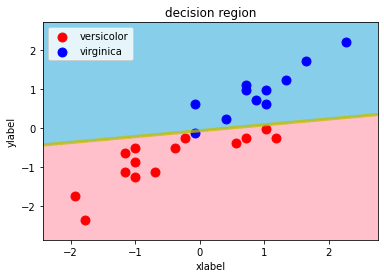

正解率 0.96
適合率 0.9333333333333333
再現率 1.0
F値 0.9655172413793104
混合行列 [[14  0]
 [ 1 10]]



In [109]:
print("ロジスティック回帰")
decision_region(arr_test_x, np.reshape(arr_test_y,[len(arr_test_y),]), lr)
showResult(arr_test_y, pred_lr)

*SVM*

In [110]:
svm = SVC(kernel='linear') # 線形svmモデルのインスタンスを作成
svm.fit(arr_train_x, arr_train_y) # 線形svmモデルの重みを学習

pred_svm = svm.predict(arr_test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(線形)SVM


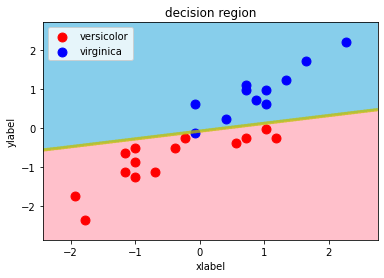

正解率 0.96
適合率 0.9333333333333333
再現率 1.0
F値 0.9655172413793104
混合行列 [[14  0]
 [ 1 10]]



In [111]:
print("(線形)SVM")
decision_region(arr_test_x, np.reshape(arr_test_y,[len(arr_test_y),]), svm)
showResult(arr_test_y, pred_svm)

*決定木*

In [112]:
clf = tree.DecisionTreeClassifier() # 決定木モデルのインスタンスを作成
clf = clf.fit(arr_train_x, arr_train_y) # 決定木モデルの重みを学習

# 作成したモデルを用いて予測を実行
pred_clf = clf.predict(arr_test_x)

決定木


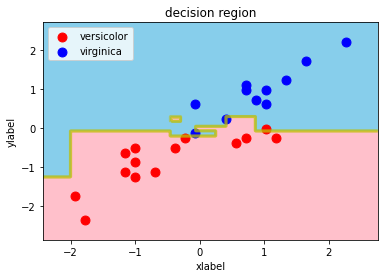

正解率 0.92
適合率 0.9285714285714286
再現率 0.9285714285714286
F値 0.9285714285714286
混合行列 [[13  1]
 [ 1 10]]



In [113]:
print("決定木")
decision_region(arr_test_x, np.reshape(arr_test_y,[len(arr_test_y),]), clf)
showResult(arr_test_y, pred_clf)

*ランダムフォレスト*

In [114]:
random_forest = RandomForestClassifier() # ランダムフォレストのインスタンスを作成
random_forest = random_forest.fit(arr_train_x, arr_train_y) # 決定木モデルの重みを学習

# 作成したモデルを用いて予測を実行
pred_random_forest = random_forest.predict(arr_test_x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ランダムフォレスト


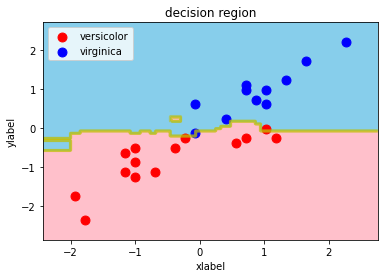

正解率 0.96
適合率 1.0
再現率 0.9285714285714286
F値 0.962962962962963
混合行列 [[13  1]
 [ 0 11]]



In [115]:
print("ランダムフォレスト")
decision_region(arr_test_x, np.reshape(arr_test_y,[len(arr_test_y),]), random_forest)
showResult(arr_test_y, pred_random_forest)

***考察***

今回の結果ではそれぞれの手法での結果にそれほど違いはなかった。